In [4]:
?data.table::fread

In [6]:
data <- data.table::fread('Clinicaldata_Results_Table-20210618131131.csv')
data

ProductName,ActiveSubstance,Mah,ProductStatus,PublicationDate,ProcedureType,AtcCode,Generic,Biosimilar,ConditionalApproval,ExceptionalCircumstances,Orphan,article58,WithdrawnProcedure,ProcedureNumber,numberOfDocuments
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Dexamethasone Taw (WD),DEXAMETHASONE PHOSPHATE,Taw Pharma (Ireland) Ltd,Withdrawn,19/03/2021,Initial marketing authorisation,H02AB02,No,No,No,No,No,No,Yes,EMEA/H/C/005740/0000,2
COMIRNATY,COVID-19 mRNA vaccine (nucleoside-modified),BioNTech Manufacturing GmbH,Authorised,11/03/2021,Initial marketing authorisation,J07BX03,No,No,Yes,No,No,No,No,EMEA/H/C/005735/0000,18
COVID-19 Vaccine Moderna,COVID-19 mRNA vaccine (nucleoside-modified),Moderna Biotech Spain S.L.,Authorised,02/03/2021,Initial marketing authorisation,J07BX03,No,No,Yes,No,No,No,No,EMEA/H/C/005791/0000,26
Veklury,REMDESIVIR,Gilead Sciences Ireland UC,Authorised,25/02/2021,Extension of indication,J05AB16,No,No,No,No,No,No,No,EMEA/H/C/005622/0000/II/0012,3
Veklury,REMDESIVIR,Gilead Sciences Ireland UC,Authorised,30/10/2020,Initial marketing authorisation,N/A,No,No,Yes,No,No,No,No,EMEA/H/C/005622/0000,64
Inovelon,RUFINAMIDE,Eisai GmbH,Authorised,04/12/2018,Extension of indication,N03AF03,No,No,No,No,Yes,No,No,EMEA/H/C/000660/II/0037,21
Ameluz,5-AMINOLEVULINIC ACID,Biofrontera Bioscience GmbH,Authorised,12/11/2018,Extension of indication,L01XD04,No,No,No,No,No,No,No,EMEA/H/C/002204/II/0020,25
Truxima,RITUXIMAB,Celltrion Healthcare Hungary Kft.,Authorised,09/11/2018,Initial marketing authorisation,L01XC02,No,Yes,No,No,No,No,No,EMEA/H/C/004112/0000,32
Alecensa,ALECTINIB,Roche Registration GmbH,Authorised,17/10/2018,Initial marketing authorisation,L01XE36,No,No,No,No,No,No,No,EMEA/H/C/004164/0000,44


In [10]:
install.packages('tidyverse')

Installing package into ‘/home/alireza/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gargle’, ‘ids’, ‘openssl’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘httr’, ‘rvest’


Warning message in install.packages("tidyverse"):
“installation of package ‘haven’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [22]:
#library(rjags)
library(R2jags)

ERROR: Error in library(R2jags): there is no package called ‘R2jags’


In [13]:
tot_vaccine <- 21999
tot_placebo <- 21539
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 86
tested   <- c(rep("Pos", pos_vaccine),
              rep("Neg", tot_vaccine - pos_vaccine),
              rep("Pos", pos_placebo),
              rep("Neg", tot_placebo - pos_placebo))
pfizer.tb <- tibble::tibble(tested = tested, patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])

         
            Neg   Pos
  Placebo 21453    86
  Vaccine 21991     8

In [14]:
modelString <- "
  model {
    for ( i in 1:Ntot ) {
      tested[i]  ̃ dbern( theta[patient[i]] );
    }
    for ( k in 1:Nclass ) {
      theta[k]  ̃ dbeta(3 , 100);
    }
  }"

In [15]:
dataList = list(tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),patient = as.integer(factor(pfizer.tb$patient)),Ntot = nrow(pfizer.tb) ,Nclass = nlevels(factor(pfizer.tb$patient)))

In [17]:
pfizer_chains <- jags::run.jags(modelString ,
                          sample = 15000,
                          n.chains = 4,
                          method = "parallel",
                          monitor = "theta",
                          data = dataList)

ERROR: Error in loadNamespace(x): there is no package called ‘jags’


In [19]:
??run.jags

No vignettes or demos or help files found with alias or concept or
title matching ‘run.jags’ using regular expression matching.

In [1]:
library(rstan)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [6]:
tot_vaccine <- 21999
tot_placebo <- 21539
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 86
tested   <- c(rep("Pos", pos_vaccine),
              rep("Neg", tot_vaccine - pos_vaccine),
              rep("Pos", pos_placebo),
              rep("Neg", tot_placebo - pos_placebo))
pfizer.tb <- tibble::tibble(tested = tested, patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])

         
            Neg   Pos
  Placebo 21453    86
  Vaccine 21991     8

In [7]:
modelString <- "
  model {
    for ( i in 1:Ntot ) {
      tested[i]  ̃ dbern( theta[patient[i]] );
    }
    for ( k in 1:Nclass ) {
      theta[k]  ̃ dbeta(3 , 100);
    }
  }"

In [ ]:
writeLines(modelString , con="stan_bern01_model.txt")

In [8]:
dataList = list(
    tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),
    patient = as.integer(factor(pfizer.tb$patient)),
    Ntot = nrow(pfizer.tb) ,
    Nclass = nlevels(factor(pfizer.tb$patient))
)

In [9]:
stanDso <- stan_model(model_code = modelString)

SYNTAX ERROR, MESSAGE(S) FROM PARSER:

Variable "Ntot" does not exist.

 error in 'model818b43d9edeb_59059b24ed600d59a7101baff59fd8c3' at line 3, column 21

  -------------------------------------------------

     1: 

     2:   model {

     3:     for ( i in 1:Ntot ) {

                            ^

     4:       tested[i]  ̃ dbern( theta[patient[i]] );

  -------------------------------------------------





ERROR: Error in stanc(file = file, model_code = model_code, model_name = model_name, : failed to parse Stan model '59059b24ed600d59a7101baff59fd8c3' due to the above error.


In [10]:
stanFit <- sampling(object=stanDso ,
                    data = dataList ,
                    chains = 3 ,
                    iter = 1000 ,
                    warmup = 200 ,
                    thin = 1)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'sampling': object 'stanDso' not found


In [1]:
library(brms)

ERROR: Error in library(brms): there is no package called ‘brms’


In [1]:
library(dplyr)
library(brms)
library(ggplot2)
library(kableExtra)
theme_set(theme_bw())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(brms): there is no package called ‘brms’


In [2]:
library(rstan)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [26]:
parallel::detectCores()

[1] 4

In [27]:
tot_vaccine <- 21999
tot_placebo <- 21539
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 86
tested   <- c(rep("Pos", pos_vaccine),
              rep("Neg", tot_vaccine - pos_vaccine),
              rep("Pos", pos_placebo),
              rep("Neg", tot_placebo - pos_placebo))
pfizer.tb <- tibble::tibble(tested = tested, patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])

         
            Neg   Pos
  Placebo 21453    86
  Vaccine 21991     8

In [28]:
dataList = list(
    tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),
    patient = as.integer(factor(pfizer.tb$patient)),
    Ntot = nrow(pfizer.tb) ,
    Nclass = nlevels(factor(pfizer.tb$patient))
)

In [29]:
modelString = "
  data {
    int<lower=0> Ntot;
    int tested[Ntot];
  }
  parameters {
    real<lower=0,upper=1> theta;
  }
  model {
    theta ~ beta(3,100);
    tested ~ bernoulli(theta);
  }"
writeLines(modelString , con="stan_bern01_model.txt")

In [30]:
stanDso <- stan_model(model_code = modelString)

In [31]:
#X <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 #      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  #     0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
   #    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    #   0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
     #  0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
      # 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       #0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       #0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       #0, 0, 0, 0, 1, 0, 0, 1, 0, 1)

#data <- NULL
#data$X <- X     # Set of observations
#data$n <- length(X)    # those to be considered
#data$n_next <- 10

In [32]:
#X <- data$X
#N <- length(X)
#dataList <- list(y = X, N = N)

In [33]:
stanFit <- sampling(object=stanDso ,
                    data = dataList ,
                    chains = 3 ,
                    iter = 1000 ,
                    warmup = 200 ,
                    thin = 1)


SAMPLING FOR MODEL 'cf7c1ba378e7c8a192065ca4c899770d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000209 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.079568 seconds (Warm-up)
Chain 1:                0.269609 seconds (Sampling)
Chai

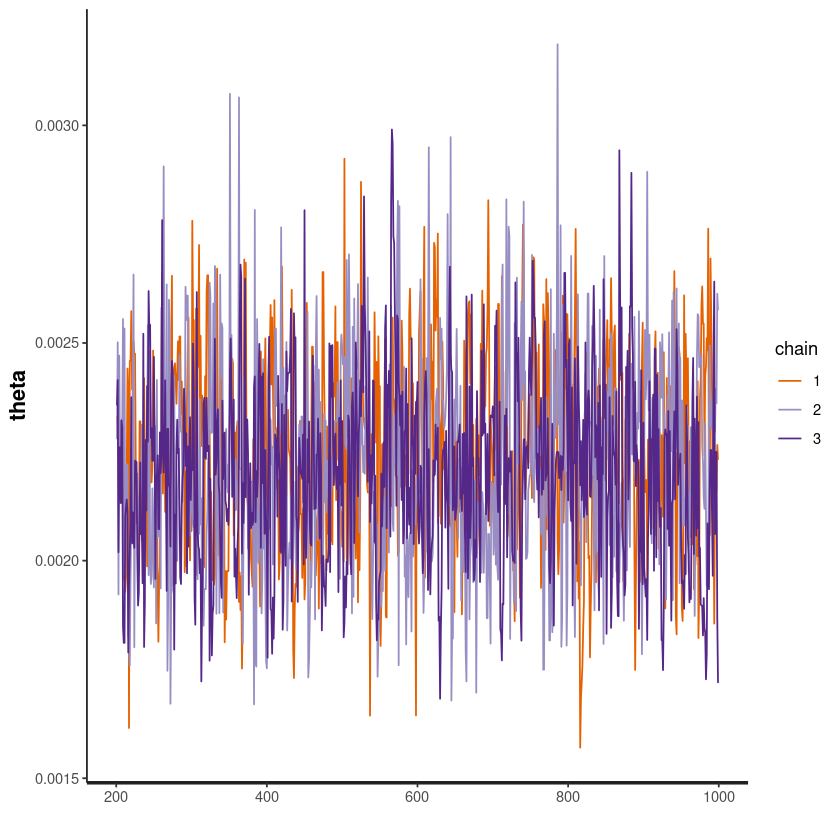

In [34]:
rstan::traceplot(stanFit,pars=c("theta"))

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



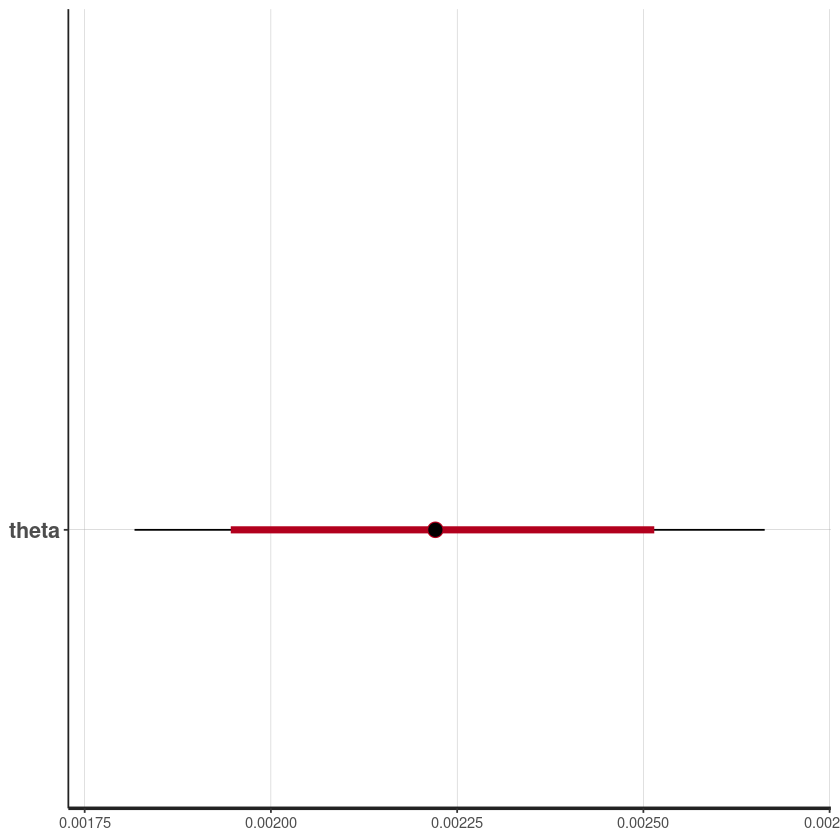

In [35]:
plot(stanFit,pars=c("theta"))

In [23]:
library(coda)


Attaching package: ‘coda’


The following object is masked from ‘package:rstan’:

    traceplot




In [44]:
mcmcCoda <- mcmc.list(lapply(1:ncol(stanFit),
                             function(x) { mcmc(as.array(stanFit)[,x,]) }))
class(mcmcCoda)
#> [1] "mcmc.list"

[1] "mcmc.list"

In [49]:
remove.packages('tidybayes')
if (file.exists(".RData")) file.remove(".RData")

Removing package from ‘/home/alireza/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



ERROR: Error in find.package(pkgs, lib): there is no package called ‘tidybayes’


In [50]:
library(tidybayes)

pfizer_res    <- tidybayes::tidy_draws(mcmcCoda) %>%
                    select('theta[1]':'theta[2]') %>%
                    rename(Placebo = 'theta[1]', Vaccine = 'theta[2]') %>%
                    mutate(diff_rate = (Placebo - Vaccine) / Placebo * 100,
                           Placebo_perc = Placebo * 100,
                           Vaccine_perc = Vaccine * 100)

ERROR: Error: Can't subset columns that don't exist.
[31m✖[39m Column `theta[1]` doesn't exist.


In [47]:
allmcmc2 <- as.mcmc(pfizer_res, vars="diff_rate")
pt3 <- plotPosterior(mcmcCoda[,"diff_rate"], 0.95, "yellow", "Diff rate")

ERROR: Error in as.mcmc(pfizer_res, vars = "diff_rate"): object 'pfizer_res' not found


In [7]:
library(rjags)
library(runjags)
library(R2jags)

In [8]:
tot_vaccine <- 18198
tot_placebo <- 18325
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 162
tested   <- c(rep("Pos", pos_vaccine),
              rep("Neg", tot_vaccine - pos_vaccine),
              rep("Pos", pos_placebo),
              rep("Neg", tot_placebo - pos_placebo))
pfizer.tb <- tibble::tibble(tested = tested, patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])

         
            Neg   Pos
  Placebo 18163   162
  Vaccine 18190     8

In [9]:
dataList = list(
    tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),
    patient = as.integer(factor(pfizer.tb$patient)),
    Ntot = nrow(pfizer.tb) ,
    Nclass = nlevels(factor(pfizer.tb$patient))
)

In [10]:
modelString <- "  
  model {
    for ( i in 1:Ntot ) {
      tested[i] ~ dbern( theta[patient[i]] )
    }
  for ( k in 1:Nclass ) {
    theta[k] ~ dbeta(3 , 100)    
    }
  theta[3] = (theta[1]-theta[2])/theta[1] * 100
  }"
writeLines(modelString , con="jags_Pfizer(test)_model.txt")

In [11]:
pfizer_chains <- run.jags(modelString ,
                          sample = 15000,
                          n.chains = 4,
                          method = "parallel",
                          monitor = "theta",
                          data = dataList)

Warning message:
“No initial values were provided - JAGS will use the same initial values for all chains”
Warning message:
“You attempted to start parallel chains without setting different PRNG for each chain, which is not recommended.  Different .RNG.name values have been added to each set of initial values.”


Calling 4 simulations using the parallel method...
Following the progress of chain 1 (the program will wait for all chains
to finish before continuing):
Welcome to JAGS 4.3.0 on Tue Jun 22 10:31:57 2021
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. . Reading data file data.txt
. Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 36523
   Unobserved stochastic nodes: 2
   Total graph size: 73055
. Reading parameter file inits1.txt
. Initializing model
. Adaptation skipped: model is not in adaptive mode.
. Updating 4000
-------------------------------------------------| 4000
************************************************** 100%
. . Updating 15000
-------------------------------------------------| 15000
************************************************** 100%
. . . . Updating 0
. Deleting model
. 
All chains have finished
Note: the model did not r

In [12]:
summary(pfizer_chains)

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.10,psrf
theta[1],7.58176e-03,8.92974e-03,1.02987e-02,8.945047e-03,0.0006950820,NA,3.486239e-06,0.5,39752,-0.0008332159,0.9999758
theta[2],2.75015e-04,5.83135e-04,9.64622e-04,6.001088e-04,0.0001812149,NA,9.096457e-07,0.5,39687,0.0067568091,1.0000065
theta[3],8.90771e+01,9.34814e+01,9.71361e+01,9.324957e+01,2.1142990938,NA,1.062051e-02,0.5,39632,0.0053951619,1.0000329


In [13]:
plot(pfizer_chains)

Generating plots...


In [15]:
str(pfizer_chains)

List of 44
 $ mcmc             :List of 4
  ..$ : 'mcmc' num [1:15000, 1:3] 0.00839 0.00903 0.00846 0.00835 0.00917 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:15000] "5001" "5002" "5003" "5004" ...
  .. .. ..$ : chr [1:3] "theta[1]" "theta[2]" "theta[3]"
  .. ..- attr(*, "mcpar")= num [1:3] 5001 20000 1
  ..$ : 'mcmc' num [1:15000, 1:3] 0.00875 0.00839 0.0084 0.00925 0.00913 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:15000] "5001" "5002" "5003" "5004" ...
  .. .. ..$ : chr [1:3] "theta[1]" "theta[2]" "theta[3]"
  .. ..- attr(*, "mcpar")= num [1:3] 5001 20000 1
  ..$ : 'mcmc' num [1:15000, 1:3] 0.00817 0.00868 0.00778 0.00883 0.00838 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:15000] "5001" "5002" "5003" "5004" ...
  .. .. ..$ : chr [1:3] "theta[1]" "theta[2]" "theta[3]"
  .. ..- attr(*, "mcpar")= num [1:3] 5001 20000 1
  ..$ : 'mcmc' num [1:15000, 1:3] 0.00972 0.00837 0.008 0.00765 0.00907 ...
  .. ..- attr(*, "dimnames")=Li

In [18]:
?plot.runjags

In [17]:
add.summary(pfizer_chains)

Calculating summary statistics...
Calculating the Gelman-Rubin statistic for 3 variables....



JAGS model summary statistics from 60000 samples (chains = 4; adapt+burnin = 5000):
                                                                              
           Lower95     Median    Upper95       Mean         SD Mode      MCerr
theta[1] 0.0076018  0.0089335   0.010329  0.0089478 0.00069569   -- 2.8414e-06
theta[2] 0.0002677 0.00058412 0.00095971 0.00060124 0.00018175   -- 7.4197e-07
theta[3]    89.072     93.472     97.144     93.239     2.1208   --  0.0086582
                                       
         MC%ofSD SSeff       AC.10 psrf
theta[1]     0.4 59946 -0.00083322    1
theta[2]     0.4 60000   0.0067568    1
theta[3]     0.4 60000   0.0053952    1

Total time taken: 1.5 minutes


In [19]:
add.summary(pfizer_chains,plots = runjags.getOption("predraw.plots"),
  plot.type = c("trace", "ecdf", "histogram", "autocorr", "key", "crosscorr"))

Calculating summary statistics...
Calculating the Gelman-Rubin statistic for 3 variables....



JAGS model summary statistics from 60000 samples (chains = 4; adapt+burnin = 5000):
                                                                              
           Lower95     Median    Upper95       Mean         SD Mode      MCerr
theta[1] 0.0076018  0.0089335   0.010329  0.0089478 0.00069569   -- 2.8414e-06
theta[2] 0.0002677 0.00058412 0.00095971 0.00060124 0.00018175   -- 7.4197e-07
theta[3]    89.072     93.472     97.144     93.239     2.1208   --  0.0086582
                                       
         MC%ofSD SSeff       AC.10 psrf
theta[1]     0.4 59946 -0.00083322    1
theta[2]     0.4 60000   0.0067568    1
theta[3]     0.4 60000   0.0053952    1

Total time taken: 1.5 minutes


In [22]:
plot(pfizer_chains,plot.type='trace')
library(tidyverse)

Generating plots...


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks runjags::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [37]:
plot(pfizer_chains,vars=c("theta[3]"),col='navy')

Generating plots...


In [38]:
mcmcCoda <- mcmc.list(lapply(1:ncol(pfizer_chains),function(x) { mcmc(as.array(pfiizer_chains)[,x,]) }))

ERROR: Error in 1:ncol(pfizer_chains): argument of length 0


In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



X,X0,X1,X2,kl_loss,loss,reconstruction_loss
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4.686300e-310,4.686295e-310,4.686295e-310,NA,NA,NA
1,4.686295e-310,4.686295e-310,4.686295e-310,NA,NA,NA
2,4.686295e-310,6.927893e-310,6.927786e-310,NA,NA,NA
3,6.927786e-310,6.927786e-310,6.927786e-310,NA,NA,NA
4,6.927810e-310,6.927786e-310,6.927786e-310,NA,NA,NA
5,6.927786e-310,6.927786e-310,6.927891e-310,NA,NA,NA
6,6.927891e-310,6.927891e-310,4.686295e-310,NA,NA,NA
7,4.686295e-310,4.686295e-310,4.686295e-310,NA,NA,NA
8,6.927887e-310,6.927892e-310,6.927891e-310,NA,NA,NA
